In [2]:
import nltk
import pandas as pd
from pandas import DataFrame
import requests
import json
from pymongo import MongoClient

import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, MWETokenizer
from nltk.util import ngrams
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords, wordnet, words
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from gensim import corpora, models, similarities, matutils, utils
import gensim
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from nltk import word_tokenize, pos_tag
from gensim import matutils, models
import scipy.sparse
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction import text


## Import DATA

In [3]:
# Get data from pickle file.
with open('df_merge_rest_AZ2.pickle','rb') as read_file:
    df_merge_rest_AZ2 = pickle.load(read_file)

In [5]:
df_merge_rest_AZ2.head()

,stars_reviews,reviews,user_id,categories,city,full_address,latitude,longitude,name,review_count,stars,state,Restaurants
0,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
1,2,Finally was able to make it here for breakfast...,gXmtPKLWPZJeJX_KPw54HA,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
2,2,:( I really wanted to like this place. I thoro...,BvjSQAFcROLp27QjaRcyoA,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
3,4,"Loved the scenic restaurant, right in the midd...",5qa1hx5GVHehlBQx0b5gFw,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
4,5,Beautiful country setting in Phoenix on an old...,nprSBcvBhvzyIbacEwzDLQ,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1


In [11]:
df_merge_rest_AZ2.shape

(158425, 13)

In [7]:
df_merge_rest_AZ2['reviews'][:2]

0    My wife took me here on my birthday for breakf...
1    Finally was able to make it here for breakfast...
Name: reviews, dtype: object

In [8]:
df_merge_rest_AZ = df_merge_rest_AZ2.head(10000)
df_merge_rest_AZ.head()

,stars_reviews,reviews,user_id,categories,city,full_address,latitude,longitude,name,review_count,stars,state,Restaurants
0,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
1,2,Finally was able to make it here for breakfast...,gXmtPKLWPZJeJX_KPw54HA,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
2,2,:( I really wanted to like this place. I thoro...,BvjSQAFcROLp27QjaRcyoA,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
3,4,"Loved the scenic restaurant, right in the midd...",5qa1hx5GVHehlBQx0b5gFw,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1
4,5,Beautiful country setting in Phoenix on an old...,nprSBcvBhvzyIbacEwzDLQ,"[Breakfast & Brunch, Restaurants]",Phoenix,"6106 S 32nd St\nPhoenix, AZ 85042",33.390792,-112.012504,Morning Glory Cafe,116,4.0,AZ,1


In [297]:
df_merge_rest_AZ2.to_csv("df_merge_rest_AZ_tableau.csv")

## Text Preprocessing 1-Data-Cleaning

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [18]:
X= df_merge_rest_AZ['reviews'].head(10000)

In [16]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
no_foreign_char = lambda x: re.sub('[^a-zA-Z0-9_]', ' ', x)
square_br = lambda x: re.sub('\[.*?\]', '', x)
non_sensical_text = lambda x: re.sub('\n', '', x)
apos = lambda x: re.sub(r"[\"\',”’–“‘—]", ' ', x)
space = lambda x: x.replace(u'\xa0', u' ')
#letters_only = lambda x: re.sub("[^a-zA-Z]", x)

X_clean = X.map(alphanumeric).map(punc_lower).map(no_foreign_char).map(square_br).map(non_sensical_text).map(apos).map(space)
X_clean

0        my wife took me here on my birthday for breakf...
1        finally was able to make it here for breakfast...
2           i really wanted to like this place  i thoro...
3        loved the scenic restaurant  right in the midd...
4        beautiful country setting in phoenix on an old...
5        i so wanted to love this place  i d heard grea...
6        i was here once  a reasonably sized girl broke...
7        i love every place on south mountain  i ve bee...
8           enjoyed brunch with mom and dog    a lovely...
9        this place has been on our to do list for over...
10       morning glory  along with the farm kitchen  th...
11       best breakie brunch food ever  the food is gre...
12       after hitting up the downtown farmers market t...
13       we were visiting phoenix for a friend s weddin...
14       they had us the moment we drove up the bark ch...
15                         ingredients fresh from the farm
16       a great place to enjoy a meal outside   the fa.

## Document-Term Matrix. CountVectorizer

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [17]:

# Count Vectorizer - remove stop words and use unigram and bigram. Also drop the top 20% of frequent terms.
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english',
                                   #stop_words=stop_words,
                                   token_pattern="\\b[a-z][a-z]+\\b", 
                                   lowercase = True, 
                                   max_df=0.8, 
                                   min_df=1)

X_cv = count_vectorizer.fit_transform(X_clean)
X_dtm = pd.DataFrame(X_cv.toarray(), columns=count_vectorizer.get_feature_names())
#X_dtm.index = X_clean.index
X_dtm.head()

,aa,aa food,aaaaargh,aaaaargh freaks,aaaallllll,aaaallllll right,aaaamzing,aaaamzing servings,aaah,aaah favorite,...,zuchini,zuchini quattro,zuchinni,zuchinni mushrooms,zuchinni olive,zurich,zurich toulouse,zushi,zushi joint,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the topic modeling using count vectorizer did not provide meaningful topics, count vectorizer is not used for further analysis and data processing.

### Word Cloud, Handmade Stop Words

In [27]:
Y = X_clean.to_frame()

from wordcloud import WordCloud
# Let's make some word clouds to find the words we want to remove
big_text = ''
for i in Y.reviews:
    big_text += ' ' + i
wc = WordCloud(stopwords = 'English', background_color="white", colormap="Dark2",
               max_font_size=200, random_state=42)

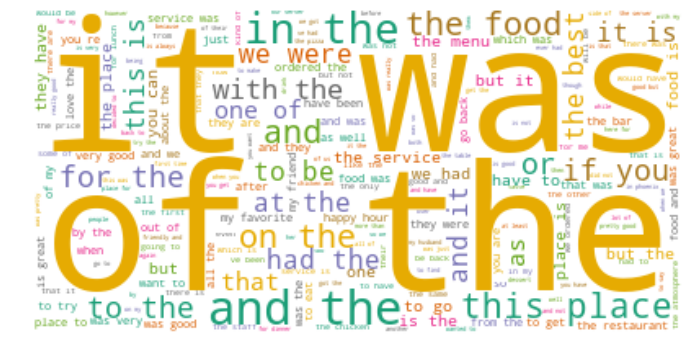

In [25]:
plt.rcParams['figure.figsize'] = [16, 6]

wc.generate(big_text)
    
plt.subplot()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()

In [26]:
words = ['buffalo', 'po', 'po boy',  'boy', 'buffalo wings', 'spicy', 'cream',  'husband', 'tea', 'flavor', 'home',"buffalo wings","rokerij", "beers","tsoynami", 'tasty', 'taste',"maizie", 'times','maybe', 'house', "pasty", 'wings', 'fries', 'buffalo', 'buffalo wings',  'puffs',   'chili fries'
         'favorite', 'ice', 'free', 'eating', 'ordered', 'prices', 'pho', 'selection', 'neighborhood', 'location', 'wish', 'salmon', 'cute', 'appetizer ' 
        "sliders", "dip",  'enchiladas', 'patio','filet', 'favorite', 'non', 'crab', "options", 'noodle', 'restaurants', " dishes", 
        "people", "right", "big", "stars", "perfect", 'appetizers', 'downstairs', 'sliders',  'dishes', 'bowls', 'real', 'chili', 'foods', 'bbq', 'reverse happy', "parm", "friendly atmosphere", "atmosphere delicious"
    'burger','sushi','rice','taco','salad','sandwich','mexican',
    'scruple','dessertspoon','teacup','cup','c','pottle','gill','dram','wineglass','coffeespoon','pound',
          'lb','tbsp','plus','firmly', 'packed','lightly','level','even','rounded','heaping','heaped','sifted',
          'bushel','peck','stick','chopped','sliced','halves', 'shredded','slivered','sliced','whole','paste',
          'whole',' fresh', 'peeled', 'diced','mashed','dried','frozen','fresh','peeled','candied','no', 'pulp',
          'crystallized','canned','crushed','minced','julienned','clove','head', 'small','large','medium', 'torn',
          'cleaned', 'degree', 'milliliter', 'bunch','inch','halved','separated','slice','quartered','can','coarsely', 
         'chinese','tortilla','bean','shrimp','mahi','pizza','burrito','pork','fish','sauce','potato',
            'fried','hibachi','breakfast','wine','beer','lunch','dinner','rib','pulled','drink','chicken',
            'thai','guacamole','onion','pie','garlic','chip','salsa','brisket','spring roll','roll','tuna',
            'buffet','tot','bacon','cheese','mac','meat','soup','curry','italian','indian','wing','charlotte',
            'restaurant','just','really','little','thing','think','didn','make','know','ok','way','lot',
            'want','star','say','wasn','place','came','tried','eaten','bq','bit','try','couple','highly',
            'looking','pretty','went','year','week','twice','did','bar','area','going','fry','food','dish',
            'steak','cooked','eat','visited','fast food','definitely','coffee','brunch','egg','biscuit',
            'waffle','grit','toast','sunday','french','bagel','french toast','pancake','spot','morning',
            'sunday brunch','sausage','benedict','mimosa','hash','super','absolutely','definitely','really',
            'worth', 'come','cake','dessert','beef','new','meal','bread','green','item','plate','special',
            'day', 'veggie', 'bowl','option','portion',
            'recommend','wonderful','amazing','loved','bad','good','nice','great','love','best','like','better',
            'excellent','terrible', "tacos", "taco", "time", "service", "menu", "ve", "la", "don", "rolls", "eggs", 
         'stingray', 'drinks',"phoenix", "ll", 'cibo',  'll', "chips", "sweet", "ya", 'seafood', 'lobster',"tempura",
         "bianco", "lee", 'middle', 'haji', 'baba', 'eastern', 'middle eastern', 'haji baba', 'hummus', 'gyro', 'pita', 
         'falafel', 'baklava', "pizzas", "pizzeria", "night", 'friend', 'friends',  'sandwiches', 'vietnamese', 'grocery', 
         'store', "sure", "miso", 'awesome', "said", "turkey", "kitchen",'lo', 'lo lo', 'waffles',  'red',  'lo waffles','litrbes','liter','millilitres','mL','grams','g', 'kg','teaspoon','tsp', 'tablespoon','tbsp','fluid',
          'ounce','oz','fl.oz', 'cup','pint','pt','quart','qt','gallon','gal','smidgen','drop','pinch','dash']
my_stop_words = text.ENGLISH_STOP_WORDS.union(words)

### Topic Modeling - Nouns and Adjectives

In [ ]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [33]:
#import nltk
#nltk.download('averaged_perceptron_tagger')
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(Y.reviews.apply(nouns_adj))
data_nouns_adj.head()

,reviews
0,wife birthday breakfast excellent weather perf...
1,able breakfast opinion i place i kind place to...
2,i place farm i busy waiter serve drinks coffee...
3,scenic restaurant right middle farm spot weeke...
4,beautiful country phoenix old farm watch easy ...


### CountVectorizer+LDA

In [38]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=my_stop_words, ngram_range=(1, 2),  token_pattern="\\b[a-z][a-z]+\\b", 
                                   lowercase = True, max_df=.9, min_df = .1)
data_cvna = cvna.fit_transform(data_nouns_adj.reviews)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna.head()

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['appetizer', 'atmosphere', 'deliciousburger', 'fast', 'fl', 'friendly', 'friesfavorite', 'happy', 'ml', 'reverse', 'spring'] not in stop_words.



,delicious,experience,friendly,happy,order,staff,table
0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

### Identify Topics in Each Document

In [42]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.246*"order" + 0.217*"table" + 0.194*"happy" + 0.185*"staff" + 0.159*"friendly" + 0.000*"experience" + 0.000*"delicious"'),
 (1,
  '0.639*"delicious" + 0.350*"experience" + 0.009*"table" + 0.001*"order" + 0.000*"friendly" + 0.000*"happy" + 0.000*"staff"')]

In [43]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.432*"delicious" + 0.331*"table" + 0.237*"experience" + 0.000*"order" + 0.000*"friendly" + 0.000*"staff" + 0.000*"happy"'),
 (1,
  '0.607*"order" + 0.392*"friendly" + 0.000*"experience" + 0.000*"staff" + 0.000*"table" + 0.000*"delicious" + 0.000*"happy"'),
 (2,
  '0.511*"happy" + 0.488*"staff" + 0.000*"friendly" + 0.000*"delicious" + 0.000*"experience" + 0.000*"table" + 0.000*"order"')]

In [46]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.758*"staff" + 0.241*"friendly" + 0.000*"experience" + 0.000*"delicious" + 0.000*"happy" + 0.000*"order" + 0.000*"table"'),
 (1,
  '0.688*"table" + 0.311*"friendly" + 0.000*"experience" + 0.000*"order" + 0.000*"happy" + 0.000*"delicious" + 0.000*"staff"'),
 (2,
  '0.603*"delicious" + 0.397*"happy" + 0.000*"friendly" + 0.000*"order" + 0.000*"experience" + 0.000*"table" + 0.000*"staff"'),
 (3,
  '0.609*"order" + 0.390*"experience" + 0.000*"table" + 0.000*"friendly" + 0.000*"delicious" + 0.000*"happy" + 0.000*"staff"')]

All topics are similar.... :(((

### LDA, CountVectorizer,  Common top words

In [50]:
data = data_dtmna.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513
delicious,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
experience,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
friendly,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
happy,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,3,1,0,0
order,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Find the top 30 words 
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('order', 1),
  ('delicious', 1),
  ('table', 0),
  ('staff', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0)],
 1: [('table', 0),
  ('staff', 0),
  ('order', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0),
  ('delicious', 0)],
 2: [('table', 0),
  ('staff', 0),
  ('order', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0),
  ('delicious', 0)],
 3: [('table', 0),
  ('staff', 0),
  ('order', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0),
  ('delicious', 0)],
 4: [('table', 0),
  ('staff', 0),
  ('order', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0),
  ('delicious', 0)],
 5: [('staff', 1),
  ('order', 1),
  ('experience', 1),
  ('table', 0),
  ('happy', 0),
  ('friendly', 0),
  ('delicious', 0)],
 6: [('table', 0),
  ('staff', 0),
  ('order', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0),
  ('delicious', 0)],
 7: [('order', 1),
  ('table', 0),
  ('staff', 0),
  ('happy', 0),
  ('friendly', 0),
  ('experience', 0

In [52]:
# Print the top 15 words 
for review, top_words in top_dict.items():
    print(review)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
order, delicious, table, staff, happy, friendly, experience
---
1
table, staff, order, happy, friendly, experience, delicious
---
2
table, staff, order, happy, friendly, experience, delicious
---
3
table, staff, order, happy, friendly, experience, delicious
---
4
table, staff, order, happy, friendly, experience, delicious
---
5
staff, order, experience, table, happy, friendly, delicious
---
6
table, staff, order, happy, friendly, experience, delicious
---
7
order, table, staff, happy, friendly, experience, delicious
---
8
table, staff, order, happy, friendly, experience, delicious
---
9
delicious, table, staff, order, happy, friendly, experience
---
10
delicious, order, happy, table, staff, friendly, experience
---
11
table, staff, order, happy, friendly, experience, delicious
---
12
table, staff, order, happy, friendly, experience, delicious
---
13
table, staff, order, happy, friendly, experience, delicious
---
14
table, happy, experience, staff, order, friendly, delicious
---
15
ta

happy, table, staff, order, friendly, experience, delicious
---
1886
table, staff, order, happy, friendly, experience, delicious
---
1887
happy, table, order, staff, friendly, experience, delicious
---
1888
happy, table, staff, order, friendly, experience, delicious
---
1889
table, staff, order, happy, friendly, experience, delicious
---
1890
experience, staff, order, happy, table, friendly, delicious
---
1891
table, staff, order, happy, friendly, experience, delicious
---
1892
table, staff, order, happy, friendly, experience, delicious
---
1893
table, staff, order, happy, friendly, experience, delicious
---
1894
friendly, table, staff, order, happy, experience, delicious
---
1895
table, staff, order, happy, friendly, experience, delicious
---
1896
happy, staff, table, order, friendly, experience, delicious
---
1897
table, staff, order, happy, friendly, experience, delicious
---
1898
table, staff, order, happy, friendly, experience, delicious
---
1899
table, staff, order, happy, friend

3257
experience, table, staff, order, happy, friendly, delicious
---
3258
staff, table, order, happy, friendly, experience, delicious
---
3259
table, staff, order, happy, friendly, experience, delicious
---
3260
table, staff, order, happy, friendly, experience, delicious
---
3261
table, staff, order, happy, friendly, experience, delicious
---
3262
happy, table, staff, order, friendly, experience, delicious
---
3263
staff, table, order, happy, friendly, experience, delicious
---
3264
table, staff, order, happy, friendly, experience, delicious
---
3265
staff, order, table, happy, friendly, experience, delicious
---
3266
table, staff, order, happy, friendly, experience, delicious
---
3267
staff, friendly, table, order, happy, experience, delicious
---
3268
staff, order, delicious, table, happy, friendly, experience
---
3269
delicious, table, order, happy, staff, friendly, experience
---
3270
staff, friendly, table, order, happy, experience, delicious
---
3271
table, staff, order, happy, f

4354
experience, table, staff, order, happy, friendly, delicious
---
4355
happy, table, staff, order, friendly, experience, delicious
---
4356
delicious, table, staff, order, happy, friendly, experience
---
4357
table, staff, order, happy, friendly, experience, delicious
---
4358
table, staff, order, happy, friendly, experience, delicious
---
4359
order, table, staff, happy, friendly, experience, delicious
---
4360
table, staff, order, happy, friendly, experience, delicious
---
4361
delicious, table, staff, order, happy, friendly, experience
---
4362
table, staff, order, happy, friendly, experience, delicious
---
4363
table, order, friendly, staff, happy, experience, delicious
---
4364
table, staff, friendly, order, happy, experience, delicious
---
4365
delicious, table, staff, order, happy, friendly, experience
---
4366
table, staff, order, happy, friendly, experience, delicious
---
4367
table, staff, order, happy, friendly, experience, delicious
---
4368
table, staff, order, happy, f

5533
order, friendly, table, staff, happy, experience, delicious
---
5534
table, staff, order, happy, friendly, experience, delicious
---
5535
table, staff, order, happy, friendly, experience, delicious
---
5536
happy, friendly, table, staff, order, experience, delicious
---
5537
delicious, table, staff, order, happy, friendly, experience
---
5538
table, staff, order, happy, friendly, experience, delicious
---
5539
table, staff, order, happy, friendly, experience, delicious
---
5540
table, staff, order, happy, friendly, experience, delicious
---
5541
table, staff, order, happy, friendly, experience, delicious
---
5542
table, staff, order, happy, friendly, experience, delicious
---
5543
table, staff, order, happy, friendly, experience, delicious
---
5544
staff, table, order, happy, friendly, experience, delicious
---
5545
delicious, table, staff, order, happy, friendly, experience
---
5546
staff, delicious, table, order, happy, friendly, experience
---
5547
table, experience, staff, ord

---
7234
table, staff, order, happy, friendly, experience, delicious
---
7235
order, table, staff, happy, friendly, experience, delicious
---
7236
table, staff, order, happy, friendly, experience, delicious
---
7237
staff, friendly, table, order, happy, experience, delicious
---
7238
table, staff, order, happy, friendly, experience, delicious
---
7239
experience, table, staff, order, happy, friendly, delicious
---
7240
table, staff, order, happy, friendly, experience, delicious
---
7241
table, staff, order, happy, friendly, experience, delicious
---
7242
table, staff, order, happy, friendly, experience, delicious
---
7243
delicious, table, staff, order, happy, friendly, experience
---
7244
table, staff, order, happy, friendly, experience, delicious
---
7245
order, table, staff, happy, friendly, experience, delicious
---
7246
table, staff, order, happy, friendly, experience, delicious
---
7247
table, staff, order, happy, friendly, experience, delicious
---
7248
table, staff, order, happ

table, staff, order, happy, friendly, experience, delicious
---
8437
table, staff, order, happy, friendly, experience, delicious
---
8438
order, delicious, table, staff, happy, friendly, experience
---
8439
order, table, staff, happy, friendly, experience, delicious
---
8440
delicious, table, staff, order, happy, friendly, experience
---
8441
table, staff, order, happy, friendly, experience, delicious
---
8442
table, staff, order, happy, friendly, experience, delicious
---
8443
happy, friendly, table, staff, order, experience, delicious
---
8444
table, staff, order, happy, friendly, experience, delicious
---
8445
table, staff, order, happy, friendly, experience, delicious
---
8446
staff, order, happy, delicious, table, friendly, experience
---
8447
table, staff, order, happy, friendly, experience, delicious
---
8448
happy, friendly, table, staff, order, experience, delicious
---
8449
staff, table, order, happy, friendly, experience, delicious
---
8450
friendly, table, staff, order, hap

---
9547
experience, table, staff, order, happy, friendly, delicious
---
9548
table, staff, order, happy, friendly, experience, delicious
---
9549
table, staff, order, happy, friendly, experience, delicious
---
9550
table, staff, order, happy, friendly, experience, delicious
---
9551
delicious, table, staff, order, happy, friendly, experience
---
9552
order, table, staff, happy, friendly, experience, delicious
---
9553
friendly, table, staff, order, happy, experience, delicious
---
9554
table, staff, order, happy, friendly, experience, delicious
---
9555
friendly, delicious, table, staff, order, happy, experience
---
9556
delicious, table, staff, order, happy, friendly, experience
---
9557
experience, table, staff, order, happy, friendly, delicious
---
9558
delicious, table, staff, order, happy, friendly, experience
---
9559
table, staff, order, happy, friendly, experience, delicious
---
9560
staff, table, order, happy, friendly, experience, delicious
---
9561
staff, friendly, table, o

10900
delicious, table, staff, order, happy, friendly, experience
---
10901
experience, table, staff, order, happy, friendly, delicious
---
10902
table, staff, order, happy, friendly, experience, delicious
---
10903
staff, table, order, happy, friendly, experience, delicious
---
10904
table, staff, order, happy, friendly, experience, delicious
---
10905
table, staff, order, happy, friendly, experience, delicious
---
10906
order, experience, table, staff, happy, friendly, delicious
---
10907
table, staff, order, happy, friendly, experience, delicious
---
10908
delicious, table, staff, order, happy, friendly, experience
---
10909
experience, table, staff, order, happy, friendly, delicious
---
10910
table, staff, order, happy, friendly, experience, delicious
---
10911
table, staff, order, happy, friendly, experience, delicious
---
10912
experience, table, staff, order, happy, friendly, delicious
---
10913
staff, delicious, table, order, happy, friendly, experience
---
10914
delicious, tab

11976
experience, table, staff, order, happy, friendly, delicious
---
11977
friendly, delicious, table, staff, order, happy, experience
---
11978
table, staff, order, happy, friendly, experience, delicious
---
11979
order, table, staff, happy, friendly, experience, delicious
---
11980
table, staff, order, happy, friendly, experience, delicious
---
11981
table, staff, order, happy, friendly, experience, delicious
---
11982
table, staff, order, happy, friendly, experience, delicious
---
11983
staff, table, order, happy, friendly, experience, delicious
---
11984
table, staff, order, happy, friendly, experience, delicious
---
11985
table, staff, order, happy, friendly, experience, delicious
---
11986
table, staff, order, happy, friendly, experience, delicious
---
11987
experience, table, staff, order, happy, friendly, delicious
---
11988
table, staff, order, happy, friendly, experience, delicious
---
11989
table, staff, order, happy, friendly, experience, delicious
---
11990
table, staff, 

In [55]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
com_words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        com_words.append(t)
        
com_words

['order',
 'delicious',
 'table',
 'staff',
 'happy',
 'friendly',
 'experience',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'staff',
 'order',
 'experience',
 'table',
 'happy',
 'friendly',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'order',
 'table',
 'staff',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'delicious',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'order',
 'happy',
 'table',
 'staff',
 'friendly',
 'experience',
 'table',
 'staff',
 'order',
 'happy',
 'friendly',
 'experience',
 'delicious',
 'table',
 'staf

In [56]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(com_words).most_common()

[('order', 10000),
 ('delicious', 10000),
 ('table', 10000),
 ('staff', 10000),
 ('happy', 10000),
 ('friendly', 10000),
 ('experience', 10000)]

In [57]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['order', 'delicious', 'table', 'staff', 'happy', 'friendly', 'experience']

In [59]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

cvna = CountVectorizer(stop_words=add_stop_words, ngram_range=(1, 2),  token_pattern="\\b[a-z][a-z]+\\b", 
                                   lowercase = True, max_df=.8, min_df = .1)
data_cvna = cvna.fit_transform(data_nouns_adj.reviews)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna.head()

,bar,best,bit,cheese,chicken,dinner,everything,favorite,few,first,...,people,place,restaurant,salad,service,side,something,time,way,wine
0,0,2,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [62]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.230*"great" + 0.217*"food" + 0.123*"service" + 0.110*"good" + 0.109*"place" + 0.053*"best" + 0.045*"restaurant" + 0.020*"favorite" + 0.020*"meal" + 0.015*"time"'),
 (1,
  '0.109*"place" + 0.103*"good" + 0.082*"time" + 0.066*"food" + 0.051*"other" + 0.051*"bar" + 0.047*"little" + 0.043*"nice" + 0.042*"night" + 0.037*"people"'),
 (2,
  '0.242*"chicken" + 0.168*"good" + 0.161*"cheese" + 0.064*"food" + 0.054*"side" + 0.038*"best" + 0.034*"way" + 0.033*"much" + 0.026*"time" + 0.017*"everything"'),
 (3,
  '0.119*"wine" + 0.109*"salad" + 0.107*"lunch" + 0.085*"place" + 0.080*"dinner" + 0.065*"great" + 0.063*"menu" + 0.051*"fresh" + 0.043*"favorite" + 0.040*"nice"')]

In [63]:
# Apply LSA to Review Data (CV1) for topic modeling. Number of components from 2 to 12 were attempted. 
# These combinations did not result in meaningful topics.
lsa_cv1 = TruncatedSVD(10)
review_topic_lsa_cv1 = lsa_cv1.fit_transform(data_dtmna)
lsa_cv1.explained_variance_ratio_

array([0.14985073, 0.0838237 , 0.07643163, 0.06526089, 0.05443632,
       0.04552983, 0.03914907, 0.03230812, 0.03013011, 0.02928196])

In [64]:
topic_word_lsa_cv1 = pd.DataFrame(lsa_cv1.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                      "component_6","component_7","component_8","component_9","component_10"],
             columns = cvna.get_feature_names())
topic_word_lsa_cv1

,bar,best,bit,cheese,chicken,dinner,everything,favorite,few,first,...,people,place,restaurant,salad,service,side,something,time,way,wine
component_1,0.106,0.101,0.068,0.096,0.134,0.081,0.060,0.052,0.068,0.079,...,0.092,0.418,0.149,0.088,0.190,0.070,0.065,0.201,0.084,0.087
component_2,-0.044,-0.028,0.014,0.047,0.092,-0.009,0.001,-0.024,-0.004,-0.006,...,-0.028,-0.484,-0.007,0.047,-0.011,0.021,0.007,-0.012,0.001,-0.073
component_3,-0.053,-0.003,0.003,-0.027,0.033,-0.018,0.001,-0.010,-0.003,0.002,...,0.004,-0.487,0.145,-0.002,0.133,-0.007,-0.007,-0.017,0.004,-0.067
component_4,0.021,0.007,-0.009,0.042,-0.040,0.035,-0.007,0.016,-0.006,-0.003,...,-0.024,-0.533,-0.040,0.022,0.079,-0.001,-0.013,0.021,-0.020,0.080
component_5,0.139,0.091,0.073,0.157,0.154,0.096,0.042,0.047,0.097,0.173,...,0.092,-0.225,0.250,0.161,0.021,0.089,0.062,0.566,0.091,0.142
component_6,-0.194,0.107,0.018,0.134,0.872,-0.026,0.010,0.009,-0.022,-0.018,...,-0.045,0.029,-0.118,0.049,-0.158,0.069,0.006,-0.115,0.003,-0.249
component_7,-0.097,-0.083,-0.061,-0.142,-0.005,-0.100,-0.033,-0.027,-0.025,0.129,...,-0.003,0.043,-0.318,-0.196,0.045,-0.068,-0.010,0.722,-0.058,-0.247
component_8,0.441,-0.025,-0.015,0.093,0.269,-0.001,-0.033,-0.010,0.036,-0.001,...,0.014,-0.067,-0.430,-0.237,0.033,-0.010,-0.007,-0.041,0.004,0.557
component_9,0.016,0.089,-0.032,-0.186,0.202,0.001,-0.022,-0.008,-0.022,-0.019,...,0.011,0.033,0.248,-0.167,0.821,-0.056,-0.031,-0.105,-0.021,-0.041
component_10,0.174,-0.044,-0.039,-0.168,0.139,-0.116,-0.024,-0.009,0.001,0.028,...,0.085,-0.008,0.616,-0.406,-0.410,-0.063,0.005,0.039,0.038,-0.015


In [ ]:
#Topic_Modeling_LSA_NMF
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [68]:
# Display the result of LSA using CV and 10 components 
display_topics(lsa_cv1, cvna.get_feature_names(), 10)


Topic  0
good, food, place, great, time, service, restaurant, menu, chicken, little

Topic  1
good, chicken, cheese, salad, little, side, meal, lunch, much, nice

Topic  2
food, restaurant, service, chicken, menu, other, meal, fresh, more, people

Topic  3
great, wine, service, good, cheese, dinner, night, salad, time, bar

Topic  4
time, restaurant, menu, first, salad, cheese, chicken, other, wine, bar

Topic  5
chicken, cheese, best, great, lunch, side, salad, place, bit, much

Topic  6
time, first, food, good, great, service, place, people, chicken, something

Topic  7
wine, bar, chicken, night, food, cheese, much, nice, few, service

Topic  8
service, restaurant, chicken, best, other, night, place, meal, bar, people

Topic  9
restaurant, bar, chicken, great, other, people, good, time, way, first


## TF-IDF

In [69]:
# TF-IDF - remove stop words and use unigram and bigram. Also drop the top 20% of frequent terms.
tfidf1 = TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1,2), max_df=.4)

review_tfidf1 = tfidf1.fit_transform(X_clean)
review_tfidf1.toarray()
review_tfidf1.shape
#min_df = 15 - service, atmosphere, wait



/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['appetizer', 'atmosphere', 'deliciousburger', 'fast', 'fl', 'friendly', 'friesfavorite', 'happy', 'ml', 'reverse', 'spring'] not in stop_words.



(10000, 336906)

## Non-Negative Matrix Factorization (NMF)

In [70]:
# Apply NMF to Data (TF-IDF) for topic modeling. Number of components from 3 to 10 were attempted. 

nmf_model_tfidf1 = NMF(5)
review_topic_nmf_tfidf1 = nmf_model_tfidf1.fit_transform(review_tfidf1)
review_topic_nmf_tfidf1

array([[0.02850599, 0.        , 0.        , 0.01281321, 0.00387533],
       [0.03548495, 0.        , 0.        , 0.        , 0.00653617],
       [0.02184239, 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.02340974, 0.04225243, 0.02101565, 0.00184387, 0.01371615],
       [0.0371781 , 0.        , 0.        , 0.        , 0.        ],
       [0.02112315, 0.        , 0.01893594, 0.        , 0.00228985]])

In [71]:
topic_word_nmf_tfidf1 = pd.DataFrame(nmf_model_tfidf1.components_.round(3),  index = ["component_1","component_2", "component_3", "component_4", "component_5"], columns = tfidf1.get_feature_names())
topic_word_nmf_tfidf1


,aa,aa art,aaaaargh,aaaaargh freaks,aaaallllll,aaaallllll defense,aaaamzing,aaaamzing servings,aaah,aaahh,...,zuchini,zuchini quattro,zuchinni,zuchinni mushrooms,zuchinni olive,zurich,zurich toulouse,zushi,zushi joint,zzzzzzzzz
component_1,0.000,0.000,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,...,0.001,0.001,0.001,0.000,0.0,0.0,0.0,0.000,0.000,0.0
component_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.001,0.0,0.0,0.0,0.000,0.000,0.0
component_3,0.002,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.002,0.001,0.000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0
component_5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.001,0.001,0.0


In [73]:
# Display the result of NMF using TFIDF
display_topics(nmf_model_tfidf1, tfidf1.get_feature_names(), 13, topic_names=['Order Experience',"Special Prices", 'Atmosphere', 'Vegetarian', 'Staff/Wait_Time'])


Topic: ' Order Experience '
got, order, table, server, wait, experience, minutes, took, asked, wanted, long, inside, thought

Topic: ' Special Prices '
happy hour, happy, hour, specials, half, hour happy, reverse happy, hour specials, apps, reverse, cheap, fantastic, decent

Topic: ' Atmosphere '
atmosphere, fun, cool, fun atmosphere, cool atmosphere, date, music, unique, romantic, friendly atmosphere, casual, live, atmosphere delicious

Topic: ' Vegetarian '
delicious, vegan, vegetarian, mock, healthy, burger, tofu, yummy, yum, vegan vegetarian, vegetarian vegan, peanut, soy

Topic: ' Staff/Wait_Time '
friendly, staff, friendly staff, staff friendly, wait, wait staff, attentive, helpful, friendly attentive, friendly helpful, fast, fun, clean


In [114]:
nmf_model_tfidf1 = NMF(6)
review_topic_nmf_tfidf1 = nmf_model_tfidf1.fit_transform(review_tfidf1)
# Convert the result of NMF using TFIDF
topic_word_nmf_tfidf1 = pd.DataFrame(nmf_model_tfidf1.components_.round(3),
             columns = tfidf1.get_feature_names())
# Display the result of NMF using TFIDF
display_topics(nmf_model_tfidf1, tfidf1.get_feature_names(), 12, topic_names=['Order Experience', "Specials", 'Atmosphere', "Vegetarian", "Staff", 'Taste'])


Topic: ' Order Experience '
got, order, table, server, wait, experience, minutes, took, asked, wanted, long, thought

Topic: ' Specials '
happy hour, happy, hour, specials, half, hour happy, reverse happy, hour specials, apps, reverse, burger, cheap

Topic: ' Atmosphere '
atmosphere, fun, cool, fun atmosphere, cool atmosphere, date, music, unique, friendly atmosphere, romantic, casual, live

Topic: ' Vegetarian '
vegan, vegetarian, mock, healthy, tofu, burger, vegan vegetarian, vegetarian vegan, peanut, yummy, soy, fake

Topic: ' Staff '
friendly, staff, friendly staff, staff friendly, wait, wait staff, attentive, helpful, friendly attentive, friendly helpful, fast, fun

Topic: ' Taste '
delicious, yum, fantastic, yummy, delicious staff, flavors, atmosphere delicious, variety, flavors delicious, variety delicious, reasonable, delicious atmosphere


These four topics look pretty decent. Let's settle on these for now.
    
    Topic 0: Order Experience
    Topic 1: Specials
    Topic 2: Atmosphere
    Topic 3: Healthy 
    Topic 3: Staff
    Topic 3: Taste 

### Topic Wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
import requests
from io import BytesIO


full_names= ['Order Experience', "Specials", 'Atmosphere', "Vegetarian", "Staff", 'Taste']

def display_topic_wordcloud(model, feature_names, no_top_words, masked=False):
    
#     response = requests.get("https://cdn2.iconfinder.com/data/icons/once-more-into-the-breach/60/explosion-512.png")
#     background_mask = np.array(Image.open(BytesIO(response.content)))
    


    topic_dic = {}
    for ix, topic in enumerate(model.components_):
        text = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_dic['Topic' + str(ix)] = text
        
    
        #Create and generate a word cloud image:
        if masked:
            wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=200, random_state=42).generate(text)
        
        else:
            wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=200, random_state=42).generate(text)
        
        
        # lower max_font_size, change the maximum number of word and lighten the background:
        #wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

        # Display the generated image:
        plt.figure(figsize=(5, 3))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(full_names[ix])
        plt.show()
    
        # Save the image in the img folder:
        #wordcloud.to_file("img.png")
    
    #return topic_dic 

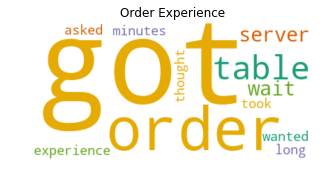

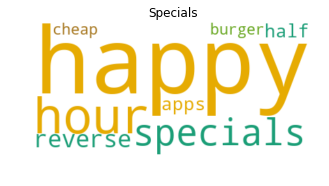

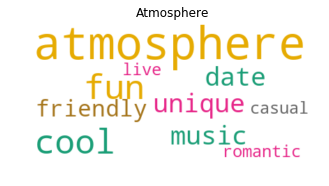

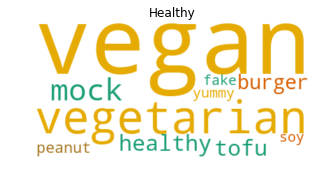

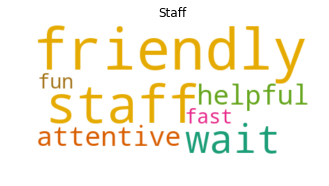

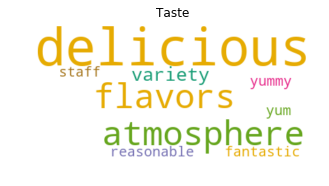

In [78]:
display_topic_wordcloud(nmf_model_tfidf1, tfidf1.get_feature_names(), 12)


In [79]:
def get_top_word_of_topics(model, vectorizer, num_topics, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict)

In [80]:
get_top_word_of_topics(nmf_model_tfidf1, tfidf1, 6, 15)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06
0,got,happy hour,atmosphere,vegan,friendly,delicious
1,order,happy,fun,vegetarian,staff,yum
2,table,hour,cool,mock,friendly staff,fantastic
3,server,specials,fun atmosphere,healthy,staff friendly,yummy
4,wait,half,cool atmosphere,tofu,wait,delicious staff
5,experience,hour happy,date,burger,wait staff,flavors
6,minutes,reverse happy,music,vegan vegetarian,attentive,atmosphere delicious
7,took,hour specials,unique,vegetarian vegan,helpful,variety
8,asked,apps,friendly atmosphere,peanut,friendly attentive,flavors delicious
9,wanted,reverse,romantic,yummy,friendly helpful,variety delicious


In [83]:
# Convert topic modeling result to Pandas dataframe.
H = pd.DataFrame(review_topic_nmf_tfidf1.round(5), columns = ['Order Experience', "Specials", 'Atmosphere', "Healthy", "Staff", 'Taste'])
H.head()
H.shape

(10000, 6)

In [84]:
df_merge = pd.concat([X, H], axis=1, join='inner')
df_merge.head(5)

,reviews,Order Experience,Specials,Atmosphere,Healthy,Staff,Taste
0,My wife took me here on my birthday for breakf...,0.02785,0.0,0.00000,0.0,0.00391,0.02263
1,Finally was able to make it here for breakfast...,0.03489,0.0,0.00000,0.0,0.00657,0.00000
2,:( I really wanted to like this place. I thoro...,0.02146,0.0,0.00000,0.0,0.00000,0.00000
3,"Loved the scenic restaurant, right in the midd...",0.00601,0.0,0.00014,0.0,0.00000,0.00000
4,Beautiful country setting in Phoenix on an old...,0.02031,0.0,0.00082,0.0,0.00160,0.00027


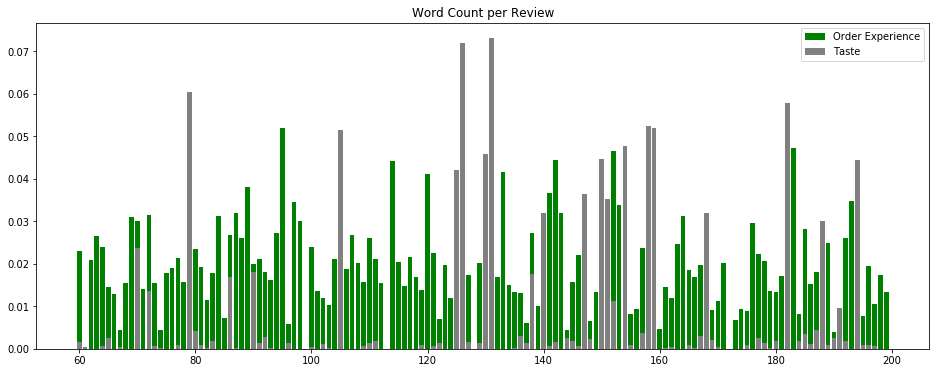

In [86]:
plt.bar(df_merge.index[60:200], df_merge['Order Experience'].iloc[60:200], color= 'green')
plt.bar(df_merge.index[60:200], df_merge['Taste'].iloc[60:200], color = 'gray')
plt.legend(['Order Experience', 'Taste'])
plt.title('Word Count per Review');

In [87]:
Z = df_merge_rest_AZ.head(10000)
Z.drop(['full_address', 'review_count', "categories",  'state', 'Restaurants'], 1, inplace=True)

df_merge2 = pd.concat([Z, H], axis=1, join='inner')
df_merge2.shape

(7861, 14)

In [89]:
df_merge2.drop(['reviews', 'user_id'], 1, inplace=True)


In [ ]:
df_merge2

In [ ]:
df_merge2.to_csv("df_merge3_reviews.csv")

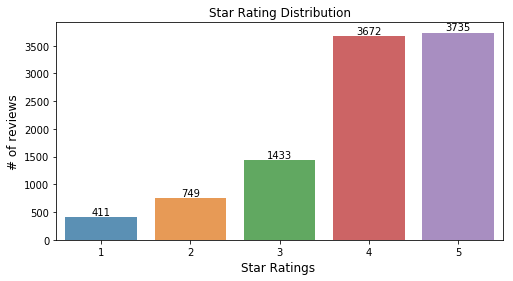

In [91]:
#Get the distribution
x=Z['stars_reviews'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

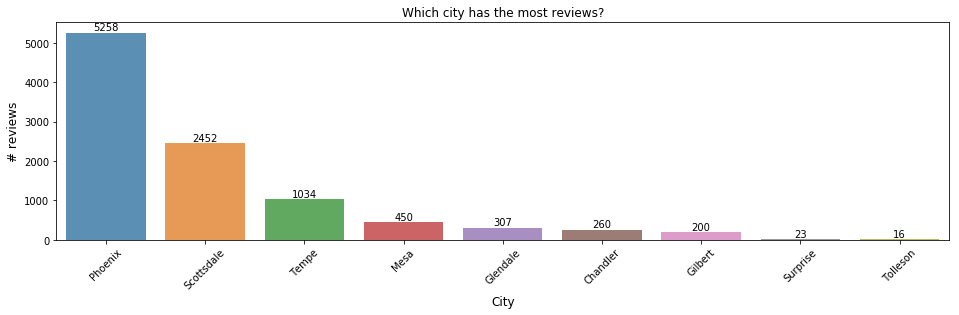

In [93]:
#Get the distribution
x=Z['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# reviews', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Feature scaling

In [94]:
# Extracted review topics for feature scaling
V = df_merge2.loc[:,['Order Experience', "Specials", 'Atmosphere', "Healthy", "Staff", 'Taste']]
# Scale the review topcs before KMeans Clustering
X_scaled = pd.DataFrame(StandardScaler().fit_transform(V)).rename(columns={0:'Order Experience', 1:"Specials", 2:'Atmosphere', 3:"Healthy", 4:"Staff", 5:'Taste'})
X_scaled.head()

X_scaled.shape

(7861, 6)

## K-Means

In [ ]:
# Run KMeans with number of clusters from 1 to 10 and collect the inertia in a list
inertia = []
k_vals = list(range(1,40))
for k in k_vals:
    km = KMeans(n_clusters=k, random_state=77)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
inertia    

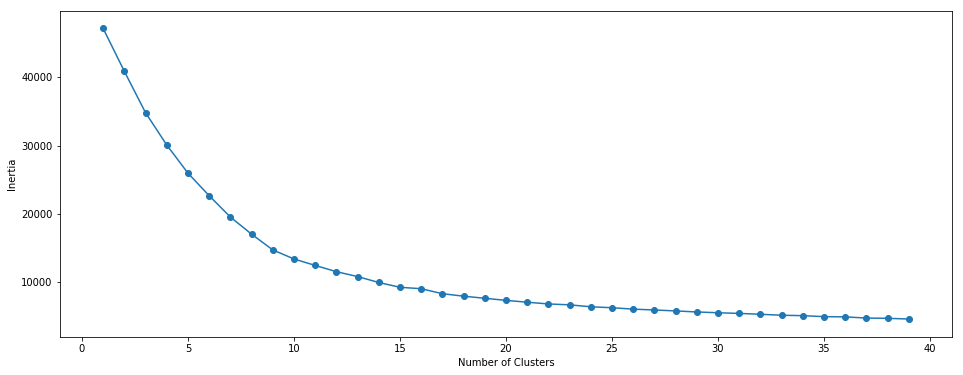

In [96]:
# Plot the inertia value vs the number of clusters. Use the elbow of the curve to pick the best number of cluster.
# 9 or 10???????
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [100]:
# Fix the data to KMeans with 9 clusters
km9 = KMeans(n_clusters=9, random_state=77)
km9.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=77, tol=0.0001, verbose=0)

In [101]:
# Combine cluster result with review topics
km9_cluster_df = pd.DataFrame(km9.labels_)
km9_cluster_df = pd.merge(km9_cluster_df,X_scaled,left_index=True, right_index=True).rename(columns={0:'Cluster'})
km9_cluster_df.head()

,Cluster,Order Experience,Specials,Atmosphere,Healthy,Staff,Taste
0,0,0.882152,-0.271495,-0.305841,-0.320264,-0.173900,0.806929
1,0,1.538734,-0.271495,-0.305841,-0.320264,-0.029510,-0.376010
2,1,0.286192,-0.271495,-0.305841,-0.320264,-0.386142,-0.376010
3,1,-1.154745,-0.271495,-0.297879,-0.320264,-0.386142,-0.376010
4,1,0.178937,-0.271495,-0.259207,-0.320264,-0.299291,-0.361896


In [102]:
# Group all the reviews by clusters and get the mean of each review topic's statistical values
km9_cluster_topic_df = km9_cluster_df.groupby('Cluster')[['Order Experience', "Specials", 'Atmosphere', "Healthy", "Staff", 'Taste']].mean()
km9_cluster_topic_df

,Order Experience,Specials,Atmosphere,Healthy,Staff,Taste
Cluster,,,,,,
0,1.171509,-0.116717,-0.150241,-0.221007,-0.142448,-0.171047
1,-0.418387,-0.165265,-0.220907,-0.149703,-0.206944,-0.301130
2,-1.053615,-0.219109,-0.106662,4.205460,-0.054345,0.064988
3,-0.886952,4.892039,-0.010674,-0.246123,-0.086444,-0.078824
4,-1.715264,-0.271495,27.631392,-0.320264,-0.386142,-0.376010
5,-0.632161,-0.181609,2.402239,-0.175790,-0.081168,-0.121810
6,-0.752341,-0.085367,0.008098,-0.184534,3.193463,-0.119764
7,-0.386647,-0.173303,-0.159715,-0.109363,-0.158651,1.932916
8,-1.715264,-0.271495,-0.305841,-0.320264,-0.386142,29.766199


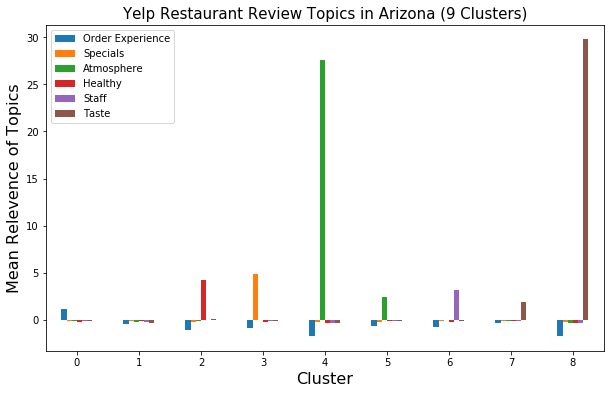

In [103]:
# Plot the results using bar plot.
km9_cluster_topic_df.plot(kind='bar', figsize=(10,6))
plt.title('Yelp Restaurant Review Topics in Arizona (9 Clusters)', size='15')
plt.xlabel('Cluster', size='16')
plt.xticks(rotation='horizontal')
plt.ylabel('Mean Relevence of Topics', size='16');

In [104]:
# Assign all reviews to their major topic.
X_scaled_major_topic = X_scaled.idxmax(axis=1)
X_scaled_major_topic 

0       Order Experience
1       Order Experience
2       Order Experience
3               Specials
4       Order Experience
5       Order Experience
6               Specials
7       Order Experience
8             Atmosphere
9       Order Experience
10                 Taste
11               Healthy
12      Order Experience
13            Atmosphere
14      Order Experience
15              Specials
16      Order Experience
17                 Staff
18      Order Experience
19                 Taste
20      Order Experience
21                 Staff
22               Healthy
23            Atmosphere
24      Order Experience
25                 Staff
26      Order Experience
27      Order Experience
28      Order Experience
29              Specials
              ...       
7831            Specials
7832            Specials
7833               Staff
7834               Staff
7835            Specials
7836            Specials
7837    Order Experience
7838               Staff
7839               Staff


In [ ]:
# Create a 2D scatter plot
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','y','m', "orange"])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()
    

In [112]:
# Use PCA to represent all information with 2 principle components.
pca = PCA(n_components=2)
pcafeatures = pca.fit_transform(X_scaled)
print('PCA Explained Variance:',pca.explained_variance_)

PCA Explained Variance: [1.35403694 1.0776859 ]


In [ ]:
km9

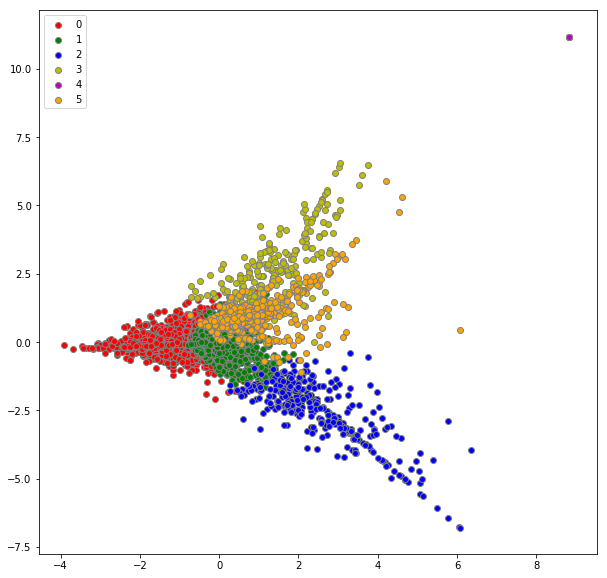

In [111]:
# 2D scatter plot with PCA results

plot_PCA_2D(pcafeatures, target=km9.labels_, target_names=[0,1,2,3,4, 5])

In [370]:
# Run Plotly examples in offline mode
init_notebook_mode(connected=True)

In [371]:
# Merge X_scaled_major_topic with pcafeatures3
major_topic_pca3_df = pd.merge(pd.DataFrame(X_scaled_major_topic).rename(columns={0:'Major_Topic'}),
          pd.DataFrame(pcafeatures).rename(columns={0:'Component_1',1:'Component_2',2:'Component_3'}),
          left_index=True, right_index=True)
major_topic_pca3_df.head(2)

,Major_Topic,Component_1,Component_2,Component_3
0,Order Experience,-0.768483,-0.465261,-0.263008
1,Order Experience,-1.499727,-0.023315,0.254950


In [372]:
# 3D scatter plot with PCA results using Plotly
data = []
clusters = []
colors = ['red','green','blue','orange','magenta', 'yellow'] # set dot colors

for i in range(len(major_topic_pca3_df['Major_Topic'].unique())): # split our data into three distinct groups
    name = major_topic_pca3_df['Major_Topic'].unique()[i]
    color = colors[i]
    x = major_topic_pca3_df[ major_topic_pca3_df['Major_Topic'] == name ]['Component_1']
    y = major_topic_pca3_df[ major_topic_pca3_df['Major_Topic'] == name ]['Component_2']
    z = major_topic_pca3_df[ major_topic_pca3_df['Major_Topic'] == name ]['Component_3']
    
    trace = dict( 
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict( 
    width=800*1.2,
    height=550*1.2,
    autosize=False,
    title='Yelp Arizona Restaurant Review Topic',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Component 1',  
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#2f2f2f'), 
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Component 2',  
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#4f4f4f'),
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Component 3',  
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#7f7f7f'),
        ),
        aspectratio = dict( x=1, y=1, z=1 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout) 

# run locally in notebook
iplot(fig)